<a href="https://colab.research.google.com/github/MhdZakiAlHafiz/pembelajaran-mesin-Mhd-Zaki-Al-Hafiz-2211533004/blob/main/praktikum_2_ML_SVM_Non_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

#fungsi plot
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

  #isi data
  plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
  plt.show()

In [6]:
def plot_predictions(clf, axes):

  #data linear
  xOs = np.linspace(axes[0], axes[1], 100)
  xls = np.linspace(axes[2], axes[3], 100)
  xO, xl = np.meshgrid(xOs, xls)
  X = np.c_[xO.ravel(), xl.ravel()]
  y_pred = clf.predict(X).reshape(xO.shape)
  y_decision = clf.decision_function(X).reshape(xO.shape)
  plt.contourf(xO, xl, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(xO, xl, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [7]:
#membuat pipeline
polynomial_svm_clf = Pipeline([
  ("poly_features", PolynomialFeatures(degree=3)),
  ("scaler", StandardScaler()),
  ("svm_clf", SVC(kernel="rbf", C=10, gamma=0.1))
])

#output
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, gamma=0.1))])

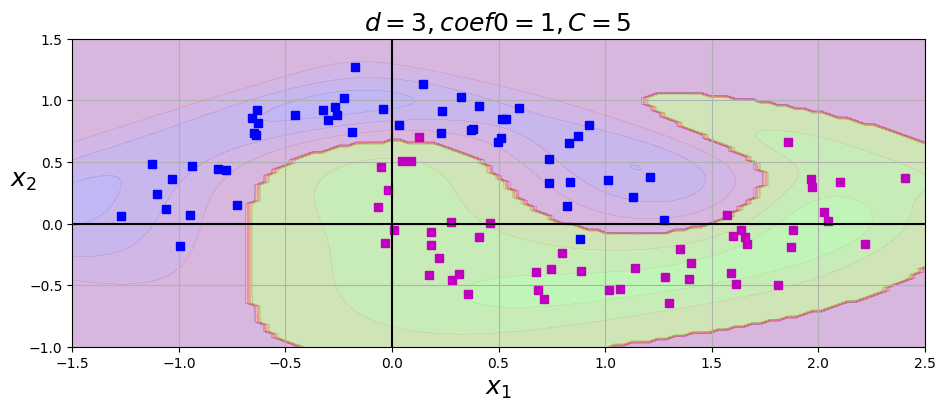

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "ms")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

# Now plotting as intended
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

# Plot dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, coef0=1, C=5$ ", fontsize=18)
plt.show()
